In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd ..

/home/purzelrakete/src/github.com/feldberlin/deepspeech


In [2]:
import os

import numpy as np
import torch
from torch.nn import functional as F
import matplotlib.pyplot as plt
import IPython.display as ipd
import wandb

from deepspeech import model, train, datasets, utils

/home/purzelrakete/src/github.com/feldberlin/deepspeech/.venv/lib/python3.7/site-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


In [3]:
def display(ds, i, sampling_rate):
    x, y = ds[i]
    xin, yin = ds.data.dataset[i]
    ipd.display(ipd.Audio(xin, rate=sampling_rate))
    print(yin, y)
    plt.figure(0, figsize=(20, 20))
    plt.imshow(x.detach().numpy())
    plt.plot()
    plt.figure(2, figsize=(8, 8))
    plt.hist(x)
    plt.plot()

# YesNo

In [4]:
p = model.HParams(graphemes=datasets.YESNO_GRAPHEMES, n_mels=64)
trainset, testset = datasets.splits(datasets.YesNo(p), p)

/home/purzelrakete/src/github.com/feldberlin/deepspeech/.venv/lib/python3.7/site-packages/torchaudio/functional.py:318: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (64) may be set too high. Or, the value for `n_freqs` (81) may be set too low.
  "At least one mel filterbank has all zero values. "


/home/purzelrakete/src/github.com/feldberlin/deepspeech/.venv/lib/python3.7/site-packages/torch/functional.py:516: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:653.)
  normalized, onesided, return_complex)
/home/purzelrakete/src/github.com/feldberlin/deepspeech/.venv/lib/python3.7/site-packages/torch/functional.py:516: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:590.)
  normalized, onesided, return_complex)


lor lor lor lor ken ken ken ken lor ken ken lor lor ken ken lor


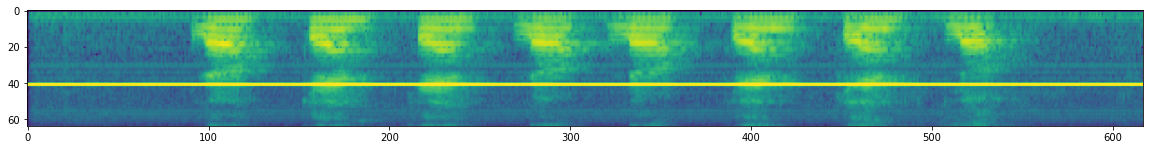

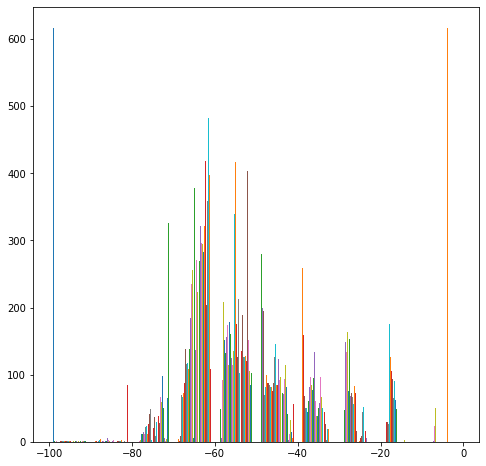

In [5]:
display(trainset, 0, p.sampling_rate)

lor lor lor lor ken ken ken ken lor lor ken lor ken lor lor ken


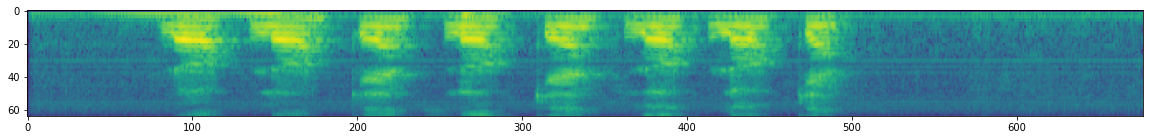

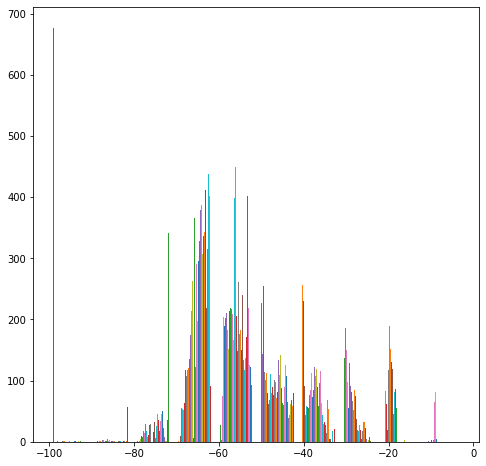

In [6]:
display(testset, 0, p.sampling_rate)

lor lor lor ken lor lor lor ken ken ken lor lor ken lor ken ken


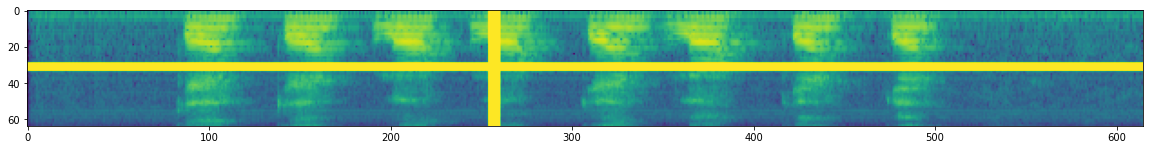

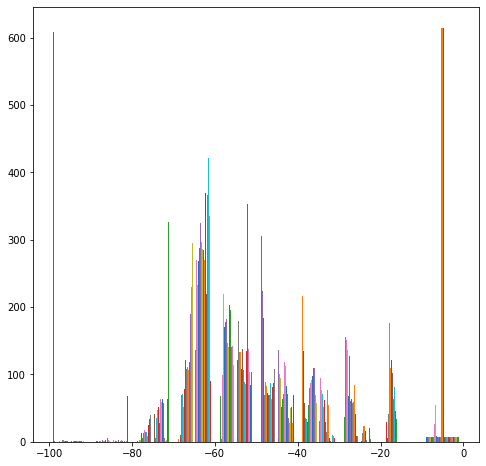

In [7]:
display(trainset, 1, p.sampling_rate)

lor lor lor ken lor lor lor ken lor lor ken ken ken ken lor lor


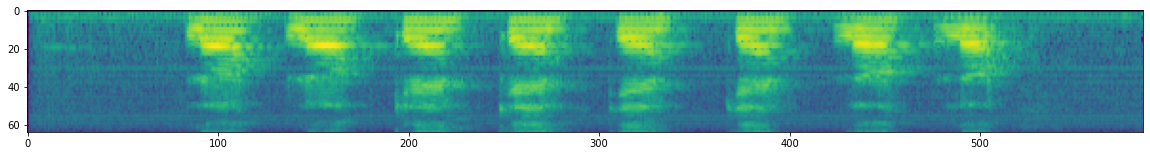

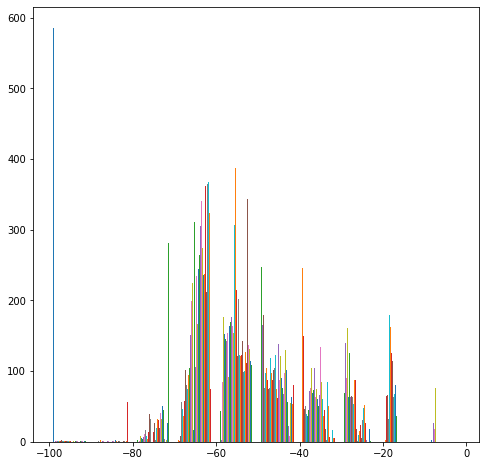

In [8]:
display(testset, 1, p.sampling_rate)

## Collation

In [9]:
batch_size = 5
batch = [trainset[i] for i in range(batch_size)]
x, nx, y, ny = datasets.batch(p)(batch)
nx_dowsampled = p.frame_lengths(nx)

In [10]:
nx, ny

(tensor([617, 615, 608, 631, 573]), tensor([31, 31, 31, 31, 31]))

In [11]:
y

tensor([[3, 5, 6, 7, 2, 1, 4, 7, 2, 1, 4, 7, 3, 5, 6, 7, 3, 5, 6, 7, 2, 1, 4, 7,
         2, 1, 4, 7, 3, 5, 6],
        [2, 1, 4, 7, 2, 1, 4, 7, 3, 5, 6, 7, 3, 5, 6, 7, 2, 1, 4, 7, 3, 5, 6, 7,
         2, 1, 4, 7, 2, 1, 4],
        [3, 5, 6, 7, 3, 5, 6, 7, 2, 1, 4, 7, 3, 5, 6, 7, 3, 5, 6, 7, 3, 5, 6, 7,
         2, 1, 4, 7, 3, 5, 6],
        [3, 5, 6, 7, 3, 5, 6, 7, 2, 1, 4, 7, 3, 5, 6, 7, 3, 5, 6, 7, 2, 1, 4, 7,
         2, 1, 4, 7, 2, 1, 4],
        [2, 1, 4, 7, 2, 1, 4, 7, 3, 5, 6, 7, 3, 5, 6, 7, 2, 1, 4, 7, 3, 5, 6, 7,
         2, 1, 4, 7, 3, 5, 6]])

In [12]:
for i in range(batch_size):
    print('want: ', trainset[i][1])
    print('gots: ', ''.join([p.graphemes[int(c)] for c in y[i]]))
    print()

want:  lor ken ken lor lor ken ken lor
gots:  lor ken ken lor lor ken ken lor

want:  ken ken lor lor ken lor ken ken
gots:  ken ken lor lor ken lor ken ken

want:  lor lor ken lor lor lor ken lor
gots:  lor lor ken lor lor lor ken lor

want:  lor lor ken lor lor ken ken ken
gots:  lor lor ken lor lor ken ken ken

want:  ken ken lor lor ken lor ken lor
gots:  ken ken lor lor ken lor ken lor



In [13]:
for i in range(batch_size):
    print('melgram: ', trainset[i][0].shape)
    print('audio: ', trainset.data.dataset[i][0].shape)
    print('batch: ', x[i].shape)
    print('nx: ', nx[i])
    print('nx_dowsampled: ', nx_dowsampled[i])
    print('ny: ', ny[i])
    print()

melgram:  torch.Size([64, 617])
audio:  torch.Size([50800])
batch:  torch.Size([64, 631])
nx:  tensor(617)
nx_dowsampled:  tensor(309)
ny:  tensor(31)

melgram:  torch.Size([64, 615])
audio:  torch.Size([54080])
batch:  torch.Size([64, 631])
nx:  tensor(615)
nx_dowsampled:  tensor(308)
ny:  tensor(31)

melgram:  torch.Size([64, 608])
audio:  torch.Size([48880])
batch:  torch.Size([64, 631])
nx:  tensor(608)
nx_dowsampled:  tensor(304)
ny:  tensor(31)

melgram:  torch.Size([64, 631])
audio:  torch.Size([48560])
batch:  torch.Size([64, 631])
nx:  tensor(631)
nx_dowsampled:  tensor(316)
ny:  tensor(31)

melgram:  torch.Size([64, 573])
audio:  torch.Size([48160])
batch:  torch.Size([64, 631])
nx:  tensor(573)
nx_dowsampled:  tensor(287)
ny:  tensor(31)



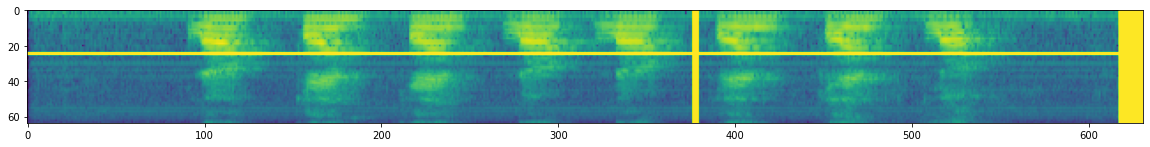

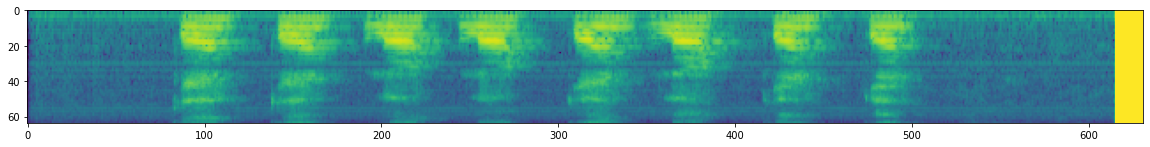

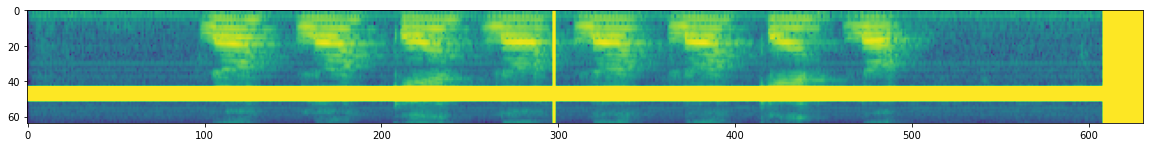

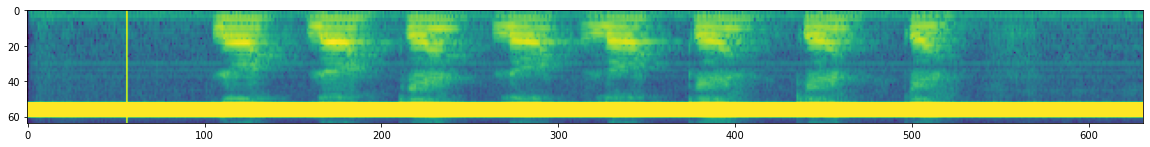

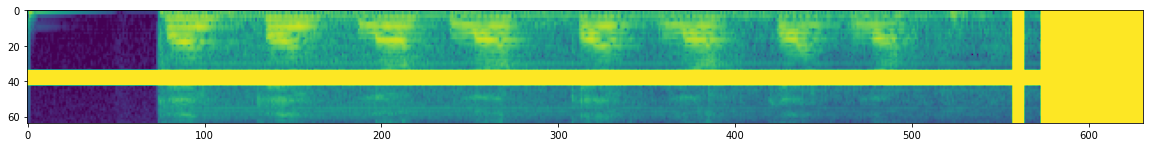

In [14]:
for i in range(batch_size):
    plt.figure(figsize=(20, 20))
    plt.imshow(x[i].detach().numpy())

## Distributions before processing

In [15]:
melspec = datasets.spec_augment(p, masked = False)[0]
yesno = datasets.YesNo(p)

In [16]:
x, y = yesno[0]
x = melspec(x)

In [17]:
def display(x):
    plt.figure(0, figsize=(20, 20))
    plt.imshow(x.detach().numpy())
    plt.plot()
    plt.figure(2, figsize=(8, 8))
    plt.hist(x)
    plt.plot();
    
def minmax(x):
    smallest, largest = x.min(), x.max()
    return (x - smallest) / (largest - smallest)

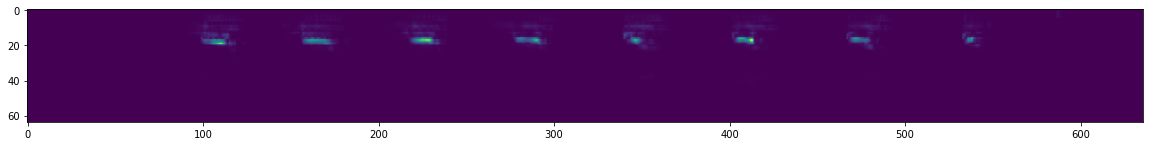

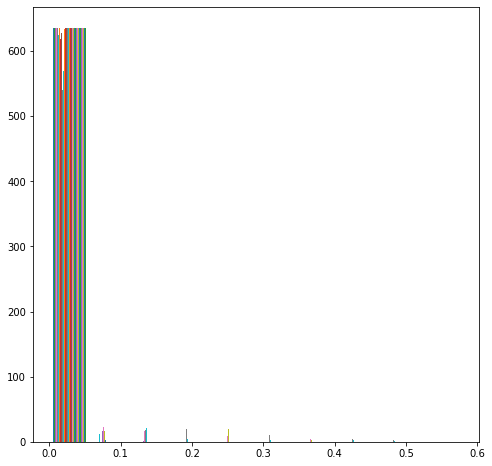

In [18]:
display(x)

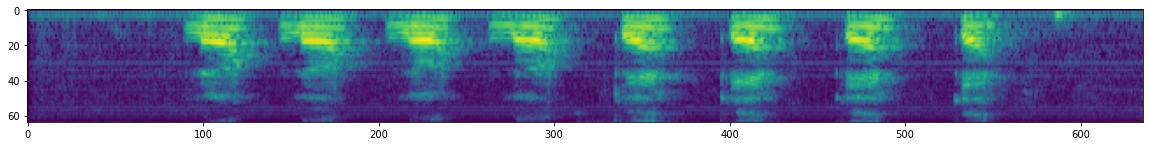

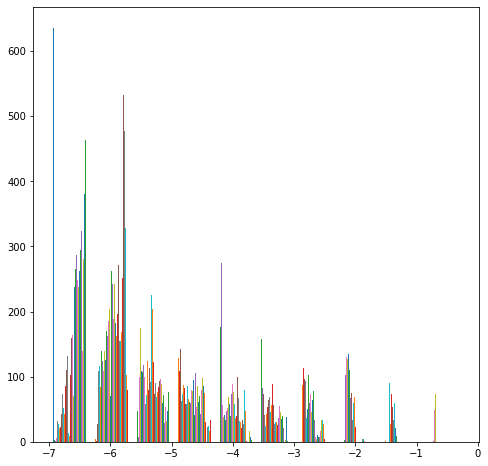

In [19]:
display((x + 1e-7).log10())

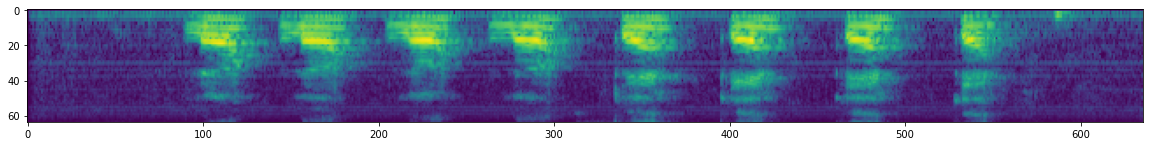

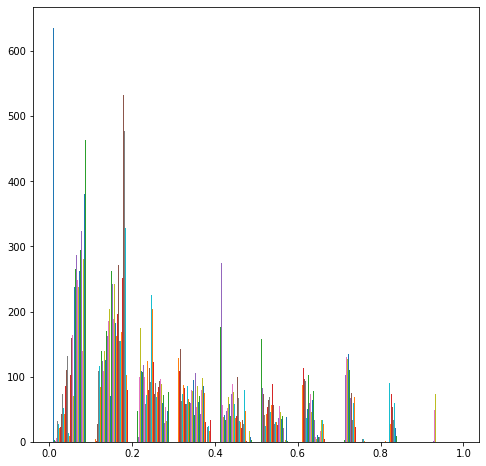

In [20]:
display(minmax((x + 1e-7).log10()))

In [32]:
import torchaudio
import math

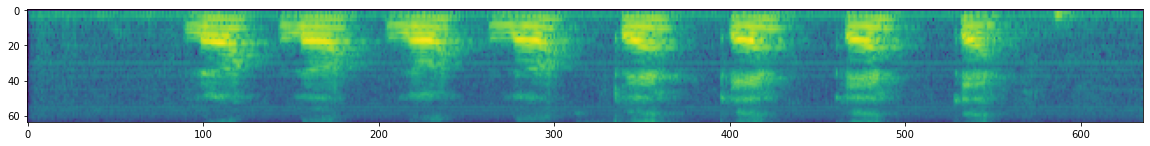

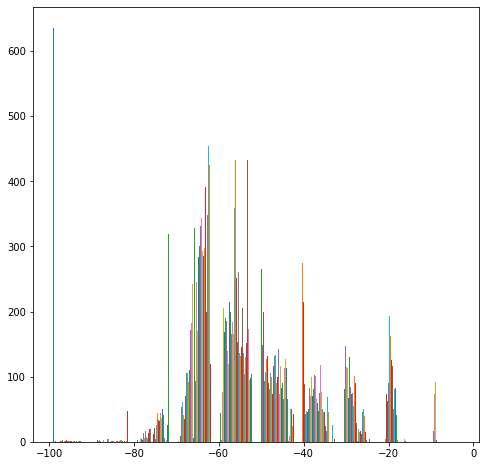

In [47]:
amin = 1e-10
display(torchaudio.functional.amplitude_to_DB(x, 10, amin, math.log10(max(amin, 1))))

In [43]:
torchaudio.functional.amplitude_to_DB?

Signature:
torchaudio.functional.amplitude_to_DB(
    x: torch.Tensor,
    multiplier: float,
    amin: float,
    db_multiplier: float,
    top_db: Union[float, NoneType] = None,
) -> torch.Tensor
Docstring:
Turn a tensor from the power/amplitude scale to the decibel scale.

This output depends on the maximum value in the input tensor, and so
may return different values for an audio clip split into snippets vs. a
a full clip.

Args:
    x (Tensor): Input tensor before being converted to decibel scale
    multiplier (float): Use 10. for power and 20. for amplitude
    amin (float): Number to clamp ``x``
    db_multiplier (float): Log10(max(reference value and amin))
    top_db (float or None, optional): Minimum negative cut-off in decibels. A reasonable number
        is 80. (Default: ``None``)

Returns:
    Tensor: Output tensor in decibel scale
File:      ~/src/github.com/feldberlin/deepspeech/.venv/lib/python3.7/site-packages/torchaudio/functional.py
Type:      function


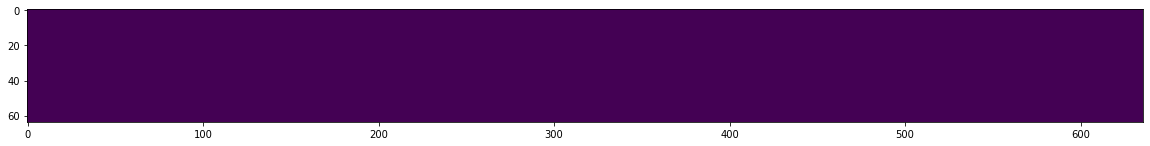

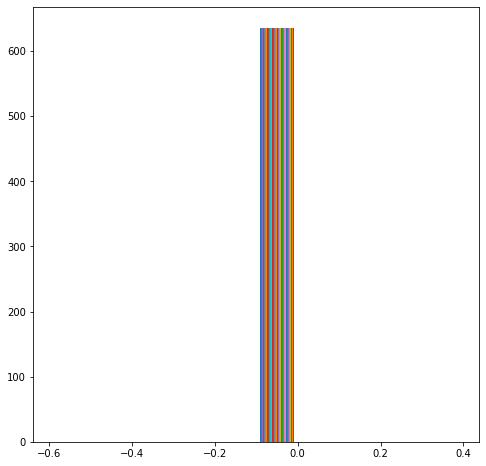

In [58]:
xlog = torch.log10(x+0.000000001)
display(torch.clamp(xlog, -0.1, 1.0))

In [56]:
torch.clamp?

Docstring:
clamp(input, min, max, *, out=None) -> Tensor

Clamp all elements in :attr:`input` into the range `[` :attr:`min`, :attr:`max` `]` and return
a resulting tensor:

.. math::
    y_i = \begin{cases}
        \text{min} & \text{if } x_i < \text{min} \\
        x_i & \text{if } \text{min} \leq x_i \leq \text{max} \\
        \text{max} & \text{if } x_i > \text{max}
    \end{cases}

If :attr:`input` is of type `FloatTensor` or `DoubleTensor`, args :attr:`min`
and :attr:`max` must be real numbers, otherwise they should be integers.

Args:
    input (Tensor): the input tensor.
    min (Number): lower-bound of the range to be clamped to
    max (Number): upper-bound of the range to be clamped to

Keyword args:
    out (Tensor, optional): the output tensor.

Example::

    >>> a = torch.randn(4)
    >>> a
    tensor([-1.7120,  0.1734, -0.0478, -0.0922])
    >>> torch.clamp(a, min=-0.5, max=0.5)
    tensor([-0.5000,  0.1734, -0.0478, -0.0922])

.. function:: clamp(input, *, min, out=Non